## 1. 영화 키워드로 12월 25일 기사 Crawling & WordCloud

In [23]:
from bs4 import BeautifulSoup
import requests
import time

user_agent = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36"}
texts = []
for i in range(1, 30, 10):
  res = requests.get(f"https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%EC%98%81%ED%99%94&sort=0&photo=0&field=0&pd=3&ds=2023.12.25&de=2023.12.25&cluster_rank=144&mynews=0&office_type=0&office_section_code=0&news_office_checked=&office_category=0&service_area=21&nso=so:r,p:from20231225to20231225,a:all&start={i}", user_agent)
  soup = BeautifulSoup(res.text, "html.parser")
  for title in soup.select('.news_tit'):
    texts.append(title.text)
print(texts)


["'나 홀로 집에' 케빈, 알고보니 상위 1% 부자…연소득 9억원대 가정의 '금수저...", '천만 영화 ‘서울의 봄’ 단관했다가 고발당한 교장… 조희연 “교권 침해다”', 'god, 내달 첫 공연실황 영화 개봉…데뷔 25주년 기념', '‘서울의 봄’, ‘범죄도시 3’ 꺾고 올해 최고 흥행영화 등극', "영화 '노량', 크리스마스에 200만 관객 돌파", '지오디 데뷔 25주년 맞아 내달 공연 실황 영화 개봉', '‘서울의 봄’ 올해 영화 우뚝…‘범죄도시3’ 넘었다[공식]', "12·12사태 그린 영화 '서울의 봄' 천만 돌파", '與 박대출, "\'선동의 봄\' 영화 찍나?" 김건희 특검법 맹비난', "영화 '괴물' 조용한 돌풍...두 소년의 '괴물'은?", "'나 홀로 집에' 케빈, 알고보니 상위 1% 부자…연소득 9억원대 가정의 '금수저...", '천만 영화 ‘서울의 봄’ 단관했다가 고발당한 교장… 조희연 “교권 침해다”', 'god, 내달 첫 공연실황 영화 개봉…데뷔 25주년 기념', '‘서울의 봄’, ‘범죄도시 3’ 꺾고 올해 최고 흥행영화 등극', "영화 '노량', 크리스마스에 200만 관객 돌파", '지오디 데뷔 25주년 맞아 내달 공연 실황 영화 개봉', '‘서울의 봄’ 올해 영화 우뚝…‘범죄도시3’ 넘었다[공식]', "12·12사태 그린 영화 '서울의 봄' 천만 돌파", '與 박대출, "\'선동의 봄\' 영화 찍나?" 김건희 특검법 맹비난', "영화 '괴물' 조용한 돌풍...두 소년의 '괴물'은?", "'나 홀로 집에' 케빈, 알고보니 상위 1% 부자…연소득 9억원대 가정의 '금수저...", '천만 영화 ‘서울의 봄’ 단관했다가 고발당한 교장… 조희연 “교권 침해다”', 'god, 내달 첫 공연실황 영화 개봉…데뷔 25주년 기념', '‘서울의 봄’, ‘범죄도시 3’ 꺾고 올해 최고 흥행영화 등극', "영화 '노량', 크리스마스에 200만 관객 돌파", '지오디 데뷔 25주년 맞아 내달 공연 실황 영화 개봉', '‘서울의 봄’ 올해 영화 우뚝…

In [24]:
len(texts), texts[:10]

(30,
 ["'나 홀로 집에' 케빈, 알고보니 상위 1% 부자…연소득 9억원대 가정의 '금수저...",
  '천만 영화 ‘서울의 봄’ 단관했다가 고발당한 교장… 조희연 “교권 침해다”',
  'god, 내달 첫 공연실황 영화 개봉…데뷔 25주년 기념',
  '‘서울의 봄’, ‘범죄도시 3’ 꺾고 올해 최고 흥행영화 등극',
  "영화 '노량', 크리스마스에 200만 관객 돌파",
  '지오디 데뷔 25주년 맞아 내달 공연 실황 영화 개봉',
  '‘서울의 봄’ 올해 영화 우뚝…‘범죄도시3’ 넘었다[공식]',
  "12·12사태 그린 영화 '서울의 봄' 천만 돌파",
  '與 박대출, "\'선동의 봄\' 영화 찍나?" 김건희 특검법 맹비난',
  "영화 '괴물' 조용한 돌풍...두 소년의 '괴물'은?"])

In [ ]:
!pip install konlpy

In [25]:
from collections import Counter
from konlpy.tag import Hannanum # 문장에서 명사를 추출하는 형태소 분석 라이브러리

words = []
hannanum = Hannanum()

#문장이 아니라 지금은 리스트이기 때문에 for문을 돌면서 각각의 형태소를 분석.
for question in texts:
  nouns = hannanum.nouns(question) #한 번 반복할 때 나오는 명사들
  for noun in nouns:
    words.append(noun.replace('.', ' ').replace('"',' ').replace(',',' ').replace("'","").replace('·', ' ').replace('=',' ').replace('\n',' ')\
                 .replace("‘", "").replace("’", "").replace("“", "").replace("”", "").replace("…", "").strip())

# counter를 이용해 각 단어의 개수.
counter = Counter(words)
counter

Counter({'집': 3,
         '케빈': 3,
         '상위': 3,
         '1': 3,
         '부자연소득': 3,
         '9억원': 3,
         '가정': 3,
         '금수저': 3,
         '천': 6,
         '영화': 24,
         '서울': 12,
         '봄': 9,
         '단관했다': 3,
         '고발': 3,
         '교장': 3,
         '조희연': 3,
         '교권': 3,
         '침해다': 3,
         '내달': 6,
         '첫': 3,
         '공연실황': 3,
         '개봉데뷔': 3,
         '25주년': 6,
         '기념': 3,
         '범죄도시': 3,
         '3': 3,
         '올해': 6,
         '최고': 3,
         '흥행영화': 3,
         '등극': 3,
         '노량': 3,
         '크리스마스': 3,
         '200': 3,
         '관객': 3,
         '돌파': 6,
         '지오디': 3,
         '데뷔': 3,
         '공연': 3,
         '실황': 3,
         '개봉': 3,
         '우뚝범죄도시3': 3,
         '넘었다': 3,
         '공식': 3,
         '12 12사태': 3,
         '與': 3,
         '박대출': 3,
         '선동': 3,
         '김건희': 3,
         '특검법': 3,
         '맹비난': 3,
         '괴물': 6,
         '조용한': 3,
         '돌풍': 3,
         '두

url의 맨 뒤에 숫자만 바꾼다고 되는 것이 아니라 "cluster_rank=144" 부분이 무작위적으로 바뀌는 것 같아서 제대로 크롤링이 안된다

In [26]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

ko_stopwords = ['가','가까스로','가령','각','각각','각자','각종','갖고말하자면','같다','같이','개의치않고','거니와','거바','거의','것','것과 같이','것들','게다가','게우다','겨우','견지에서','결과에 이르다','결국','결론을 낼 수 있다','겸사겸사','고려하면','고로','곧','공동으로','과','과연','관계가 있다','관계없이','관련이 있다','관하여','관한','관해서는','구','구체적으로','구토하다','그','그들','그때','그래','그래도','그래서','그러나','그러니','그러니까','그러면','그러므로','그러한즉','그런 까닭에','그런데','그런즉','그럼','그럼에도 불구하고','그렇게 함으로써','그렇지','그렇지 않다면','그렇지 않으면','그렇지만','그렇지않으면','그리고','그리하여','그만이다','그에 따르는','그위에','그저','그중에서','그치지 않다','근거로','근거하여','기대여','기점으로','기준으로','기타','까닭으로','까악','까지','까지 미치다','까지도','꽈당','끙끙','끼익','나','나머지는','남들','남짓','너','너희','너희들','네','넷','년','논하지 않다','놀라다','누가 알겠는가','누구','다른','다른 방면으로','다만','다섯','다소','다수','다시 말하자면','다시말하면','다음','다음에','다음으로','단지','답다','당신','당장','대로 하다','대하면','대하여','대해 말하자면','대해서','댕그','더구나','더군다나','더라도','더불어','더욱더','더욱이는','도달하다','도착하다','동시에','동안','된바에야','된이상','두번째로','둘','둥둥','뒤따라','뒤이어','든간에','들','등','등등','딩동','따라','따라서','따위','따지지 않다','딱','때','때가 되어','때문에','또','또한','뚝뚝','라 해도','령','로','로 인하여','로부터','로써','륙','를','마음대로','마저','마저도','마치','막론하고','만 못하다','만약','만약에','만은 아니다','만이 아니다','만일','만큼','말하자면','말할것도 없고','매','매번','메쓰겁다','몇','모','모두','무렵','무릎쓰고','무슨','무엇','무엇때문에','물론','및','바꾸어말하면','바꾸어말하자면','바꾸어서 말하면','바꾸어서 한다면','바꿔 말하면','바로','바와같이','밖에 안된다','반대로','반대로 말하자면','반드시','버금','보는데서','보다더','보드득','본대로','봐','봐라','부류의 사람들','부터','불구하고','불문하고','붕붕','비걱거리다','비교적','비길수 없다','비로소','비록','비슷하다','비추어 보아','비하면','뿐만 아니라','뿐만아니라','뿐이다','삐걱','삐걱거리다','사','삼','상대적으로 말하자면','생각한대로','설령','설마','설사','셋','소생','소인','솨','쉿','습니까','습니다','시각','시간','시작하여','시초에','시키다','실로','심지어','아','아니','아니나다를가','아니라면','아니면','아니었다면','아래윗','아무거나','아무도','아야','아울러','아이','아이고','아이구','아이야','아이쿠','아하','아홉','안 그러면','않기 위하여','않기 위해서','알 수 있다','알았어','앗','앞에서','앞의것','야','약간','양자','어','어기여차','어느','어느 년도','어느것','어느곳','어느때','어느쪽','어느해','어디','어때','어떠한','어떤','어떤것','어떤것들','어떻게','어떻해','어이','어째서','어쨋든','어쩔수 없다','어찌','어찌됏든','어찌됏어','어찌하든지','어찌하여','언제','언젠가','얼마','얼마 안 되는 것','얼마간','얼마나','얼마든지','얼마만큼','얼마큼','엉엉','에','에 가서','에 달려 있다','에 대해','에 있다','에 한하다','에게','에서','여','여기','여덟','여러분','여보시오','여부','여섯','여전히','여차','연관되다','연이서','영','영차','옆사람','예','예를 들면','예를 들자면','예컨대','예하면','오','오로지','오르다','오자마자','오직','오호','오히려','와','와 같은 사람들','와르르','와아','왜','왜냐하면','외에도','요만큼','요만한 것','요만한걸','요컨대','우르르','우리','우리들','우선','우에 종합한것과같이','운운','월','위에서 서술한바와같이','위하여','위해서','윙윙','육','으로','으로 인하여','으로서','으로써','을','응','응당','의','의거하여','의지하여','의해','의해되다','의해서','이','이 되다','이 때문에','이 밖에','이 외에','이 정도의','이것','이곳','이때','이라면','이래','이러이러하다','이러한','이런','이럴정도로','이렇게 많은 것','이렇게되면','이렇게말하자면','이렇구나','이로 인하여','이르기까지','이리하여','이만큼','이번','이봐','이상','이어서','이었다','이와 같다','이와 같은','이와 반대로','이와같다면','이외에도','이용하여','이유만으로','이젠','이지만','이쪽','이천구','이천육','이천칠','이천팔','인 듯하다','인젠','일','일것이다','일곱','일단','일때','일반적으로','일지라도','임에 틀림없다','입각하여','입장에서','잇따라','있다','자','자기','자기집','자마자','자신','잠깐','잠시','저','저것','저것만큼','저기','저쪽','저희','전부','전자','전후','점에서 보아','정도에 이르다','제','제각기','제외하고','조금','조차','조차도','졸졸','좀','좋아','좍좍','주룩주룩','주저하지 않고','줄은 몰랏다','줄은모른다','중에서','중의하나','즈음하여','즉','즉시','지든지','지만','지말고','진짜로','쪽으로','차라리','참','참나','첫번째로','쳇','총적으로','총적으로 말하면','총적으로 보면','칠','콸콸','쾅쾅','쿵','타다','타인','탕탕','토하다','통하여','툭','퉤','틈타','팍','팔','퍽','펄렁','하','하게될것이다','하게하다','하겠는가','하고 있다','하고있었다','하곤하였다','하구나','하기 때문에','하기 위하여','하기는한데','하기만 하면','하기보다는','하기에','하나','하느니','하는 김에','하는 편이 낫다','하는것도','하는것만 못하다','하는것이 낫다','하는바','하더라도','하도다','하도록시키다','하도록하다','하든지','하려고하다','하마터면','하면 할수록','하면된다','하면서','하물며','하여금','하여야','하자마자','하지 않는다면','하지 않도록','하지마','하지마라','하지만','하하','한 까닭에','한 이유는','한 후','한다면','한다면 몰라도','한데','한마디','한적이있다','한켠으로는','한항목','할 따름이다','할 생각이다','할 줄 안다','할 지경이다','할 힘이 있다','할때','할만하다','할망정','할뿐','할수있다','할수있어','할줄알다','할지라도','할지언정','함께','해도된다','해도좋다','해봐요','해서는 안된다','해야한다','해요','했어요','향하다','향하여','향해서','허','허걱','허허','헉','헉헉','헐떡헐떡','형식으로 쓰여','혹시','혹은','혼자','훨씬','휘익','휴','흐흐','흥','힘입어']
for ko_stopword in ko_stopwords:
  STOPWORDS.add(ko_stopword)

def draw_wordcloud(img, counter, stopwords=None):
  mask = np.array(Image.open(img))
  mask[mask == 0] = 255
  mask[mask < 255] = 0
  wordcloud = WordCloud(font_path='NanumGothic.ttf', stopwords=stopwords, mask=mask, background_color='gray', random_state=42)
  img = wordcloud.generate_from_frequencies(counter)
  plt.figure(figsize=(15,10))
  plt.imshow(img)
  plt.axis('off')
  plt.show()


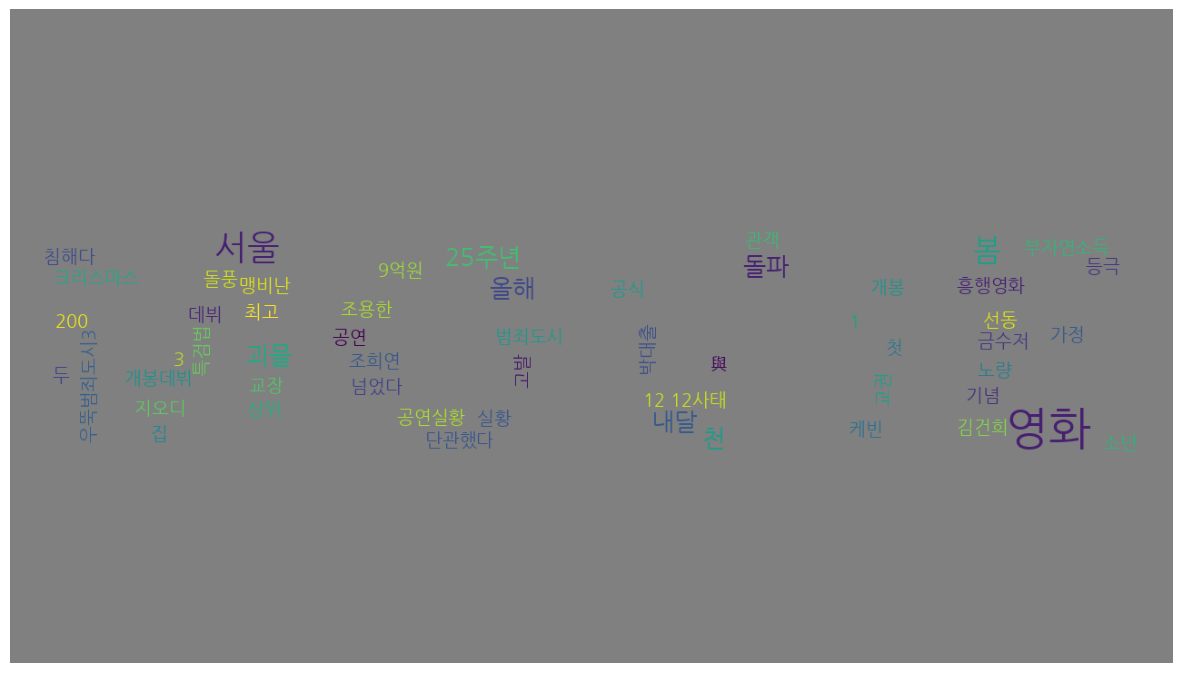

In [27]:
draw_wordcloud('./movie.png', counter)

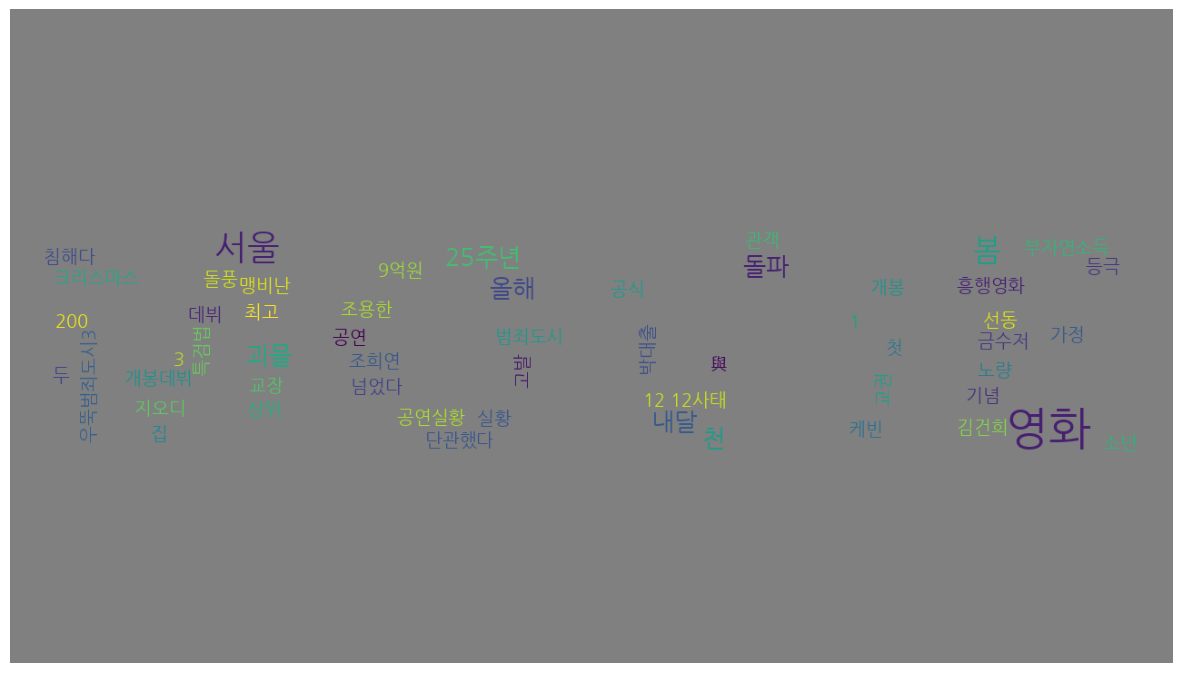

In [28]:
draw_wordcloud('./movie.png', counter, STOPWORDS.add("영화"))

## 2. 2023년 12월 25일 랭킹 기사 Crawling & WordCloud

In [29]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import nltk
from konlpy.tag import Kkma
from konlpy.tag import Twitter
from wordcloud import WordCloud

date='20231225'
news_url = 'https://news.naver.com/main/ranking/popularDay.nhn?date={}'.format(date)
headers = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.90 Safari/537.36'}
req = requests.get(news_url, headers = headers)

In [31]:
soup = BeautifulSoup(req.text, 'html.parser')
news_titles = soup.select('.rankingnews_box > ul > li > div > a')
crowled_title = []
for i in range(len(news_titles)):
 crowled_title.append(news_titles[i].text)
 if i+1 <= 50:
  print(i+1, news_titles[i].text)

1 매년 거액이 계좌에?…크리스마스 캐럴 수익의 세계 (영상)
2 민주 "윤석열 '새끼' 발언 확인…국민 속인 사실 사과해야"
3 '김승연 차남' 김동원 한화생명 사장, 글로벌사업 성과 '절실'
4 대전 오정동 식당 건물서 폭발 사고...12명 부상
5 로또 1099회 당첨번호 1등 29억, '서울·경기 합쳐도 안되네'
6 “여자 ‘눈물 냄새’만 맡아도…남성 ‘이것’ 줄어든다”
7 방송보다 화들짝… “귓불에 ‘이런 주름’ 건강 적신호”
8 “유영철·강호순 크리스마스 식단이 소고기미역국에 떡갈비라고?”
9 경복궁 낙서범 “월급 1000만원에 컴퓨터 준다고 했다”
10 “1000만원이 나흘 새 3배로”… 손맛 본 고수익, 악몽의 시작
11 [단독]전국 초중고 33곳 내년 문닫는다… 올해의 1.8배
12 [단독]불길 피해 0세, 2세 품고 뛰어내린 부부…父는 숨져
13 서울 지하철 노선도, 40년 만에 바뀐다
14 내일 취임 한동훈, 첫 시험대는 ‘이준석 탈당’
15 16년 집권, 군부 출신 대통령…그 나라에 드리운 먹구름[이세형의 더 가까이 중동]
16 손바닥만한 중계기 켜면 초고속 5G 통신망 구축
17 치킨 한 마리 '반의 반값'...치열한 가성비 경쟁
18 성탄절 비극의 화재..."아이 안고 뛰어내린 아빠 숨져"
19 '30억대 사기' 전청조 "범행 부풀려져"...남현희 '공범' 수사는 해 넘길 듯
20 중고거래 사기 하루 평균 800건...피해자 협박까지
21 치킨 먹으면서...12시간 동안 죽을 때까지 때렸다 [그해 오늘]
22 “아가씨, 어디 살아?” 女승객 있는데 종이컵에 소변 본 버스기사
23 ‘더글로리’ 박성훈, 성동구 ‘19억 아파트’ 매입[누구집]
24 서울 도봉구 아파트서 불…30대 2명 사망·29명 중경상
25 환승역 딱 보이네…서울 지하철 노선도 이렇게 바뀝니다
26 “목욕탕서 비명 지르며 쓰러져”…3명 사망
27 “학생이라고 속여 판 거냐”…노량진 수산시장 ‘상한 대게’ 논란 [잇슈 키워드]
28 골칫덩이서 복덩이로…정어리 사료 대변신


In [32]:
title = "".join(crowled_title)
filtered_title = title.replace('.', ' ').replace('"',' ').replace(',',' ').replace("'","").replace('·', ' ').replace('=',' ').replace('\n',' ')
filtered_title

'매년 거액이 계좌에?…크리스마스 캐럴 수익의 세계 (영상)민주  윤석열 새끼 발언 확인…국민 속인 사실 사과해야 김승연 차남 김동원 한화생명 사장  글로벌사업 성과 절실대전 오정동 식당 건물서 폭발 사고   12명 부상로또 1099회 당첨번호 1등 29억  서울 경기 합쳐도 안되네“여자 ‘눈물 냄새’만 맡아도…남성 ‘이것’ 줄어든다”방송보다 화들짝… “귓불에 ‘이런 주름’ 건강 적신호”“유영철 강호순 크리스마스 식단이 소고기미역국에 떡갈비라고?”경복궁 낙서범 “월급 1000만원에 컴퓨터 준다고 했다”“1000만원이 나흘 새 3배로”… 손맛 본 고수익  악몽의 시작[단독]전국 초중고 33곳 내년 문닫는다… 올해의 1 8배[단독]불길 피해 0세  2세 품고 뛰어내린 부부…父는 숨져서울 지하철 노선도  40년 만에 바뀐다내일 취임 한동훈  첫 시험대는 ‘이준석 탈당’16년 집권  군부 출신 대통령…그 나라에 드리운 먹구름[이세형의 더 가까이 중동]손바닥만한 중계기 켜면 초고속 5G 통신망 구축치킨 한 마리 반의 반값   치열한 가성비 경쟁성탄절 비극의 화재    아이 안고 뛰어내린 아빠 숨져 30억대 사기 전청조  범행 부풀려져    남현희 공범 수사는 해 넘길 듯중고거래 사기 하루 평균 800건   피해자 협박까지치킨 먹으면서   12시간 동안 죽을 때까지 때렸다 [그해 오늘]“아가씨  어디 살아?” 女승객 있는데 종이컵에 소변 본 버스기사‘더글로리’ 박성훈  성동구 ‘19억 아파트’ 매입[누구집]서울 도봉구 아파트서 불…30대 2명 사망 29명 중경상환승역 딱 보이네…서울 지하철 노선도 이렇게 바뀝니다“목욕탕서 비명 지르며 쓰러져”…3명 사망“학생이라고 속여 판 거냐”…노량진 수산시장 ‘상한 대게’ 논란 [잇슈 키워드]골칫덩이서 복덩이로…정어리 사료 대변신서울 도봉구 아파트 불로 2명 숨져…“아빠가 아기 안고 추락”로마 트레비분수에 올해 쌓인 동전만 23억 원…역대 최대 [잇슈 SNS]복도 한가운데 ‘중문’… 복도식 아파트 ‘리모델링’ 논란불난 아파트서 두 아

In [33]:
tw = Twitter() # Twitter가 Okt로 변경
tokens_ko = tw.nouns(filtered_title)
tokens_ko
ko = nltk.Text(tokens_ko, name='기사 내 명사')
ko.tokens
ko.vocab()
new_ko=[]
for word in ko:
  if len(word) > 1 and word != '단독' and word != ' ':
    new_ko.append(word)
new_ko
ko = nltk.Text(new_ko, name = '기사 내 명사 두 번째')
ko.tokens
ko.vocab()
data = ko.vocab().most_common(150)
data = dict(data)
data

/usr/local/lib/python3.10/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


{'서울': 21,
 '한동훈': 21,
 '성탄절': 21,
 '아파트': 20,
 '아빠': 18,
 '크리스마스': 17,
 '화재': 17,
 '안고': 15,
 '이준석': 14,
 '아이': 12,
 '올해': 10,
 '대통령': 10,
 '대게': 9,
 '김건희': 9,
 '뉴스': 9,
 '영상': 8,
 '사고': 8,
 '눈물': 8,
 '내년': 8,
 '도봉구': 8,
 '사망': 8,
 '논란': 8,
 '자녀': 8,
 '목욕탕': 7,
 '노량진': 7,
 '산타': 7,
 '한국': 7,
 '이브': 7,
 '결혼': 7,
 '아내': 7,
 '아들': 7,
 '가격': 7,
 '세계': 6,
 '남성': 6,
 '탈당': 6,
 '비극': 6,
 '중경상': 6,
 '수산시장': 6,
 '아기': 6,
 '최대': 6,
 '한파': 6,
 '새벽': 6,
 '건설': 6,
 '직원': 6,
 '공개': 6,
 '가족': 6,
 '총선': 6,
 '국민': 5,
 '건강': 5,
 '피해': 5,
 '지하철': 5,
 '노선도': 5,
 '거래': 5,
 '오늘': 5,
 '역대': 5,
 '개월': 5,
 '부모': 5,
 '홀로': 5,
 '신고': 5,
 '최고': 5,
 '삼성': 5,
 '부동산': 5,
 '하락': 5,
 '넘버스': 5,
 '윤석열': 4,
 '사업': 4,
 '냄새': 4,
 '전국': 4,
 '중고': 4,
 '부부': 4,
 '마리': 4,
 '명동': 4,
 '명품': 4,
 '청주': 4,
 '눈썰매장': 4,
 '타고': 4,
 '주간': 4,
 '참변': 4,
 '이름': 4,
 '시장': 4,
 '가장': 4,
 '가짜': 4,
 '유튜버': 4,
 '시민': 4,
 '매일': 4,
 '영국': 4,
 '대신': 4,
 '일본': 4,
 '상장': 4,
 '동생': 4,
 '딸기': 4,
 '케이크': 4,
 '인물': 4,
 '이유': 4,
 '여성': 4,
 '감전사': 4,
 '이

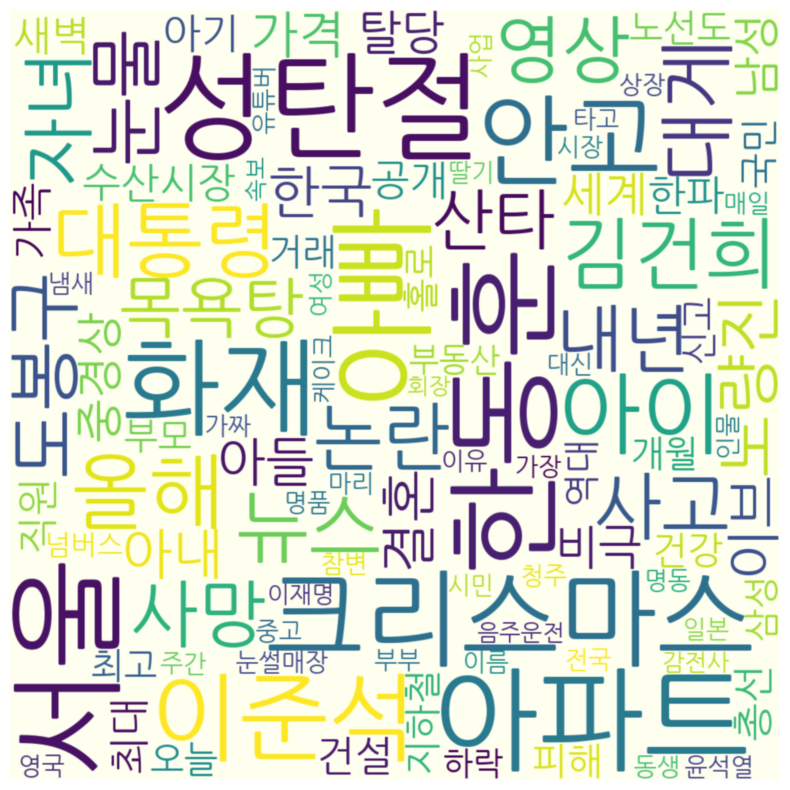

In [44]:
wordcloud = WordCloud().generate(filtered_title)
font = 'NanumGothic.ttf'
wc = WordCloud(font_path=font, background_color="ivory", width=1000, height=1000, max_words=100, max_font_size=150)
wc = wc.generate_from_frequencies(data)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()